#Boosting Algorithm

Simplified: The boosting algorithm assesses model predictions and increases the weight of samples with a more significant error

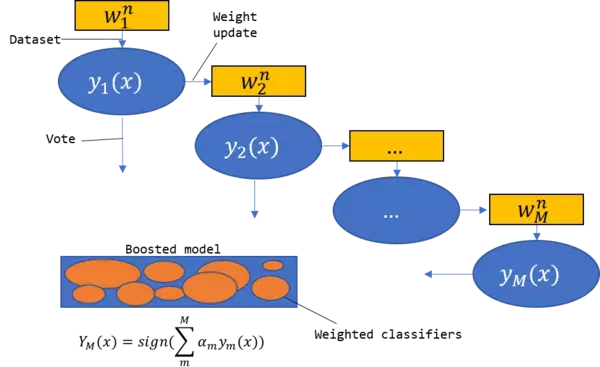

boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

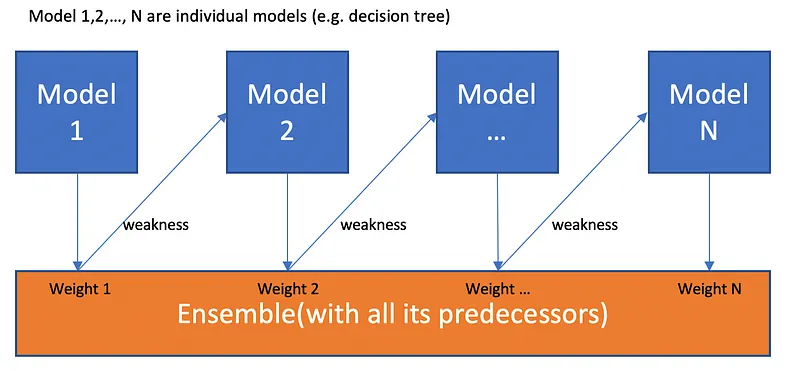

 Boosting needs you to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it.

#Pseucode

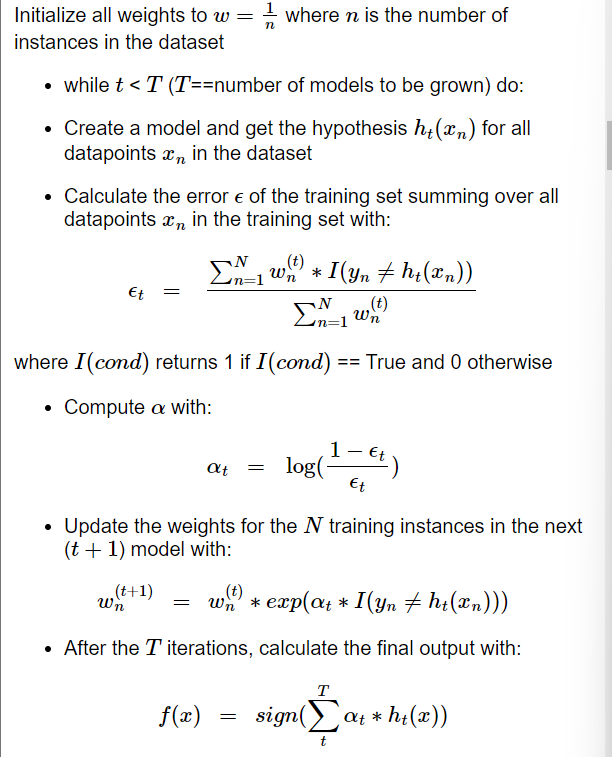

0.9666666666666667
[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]


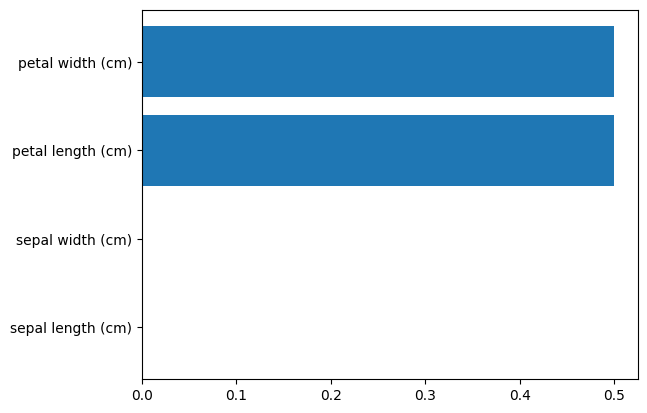

In [52]:
#Code Implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

data, target = load_iris(return_X_y=True)
colnames=load_iris().feature_names+["target"];targetnames=load_iris().target_names
df=pd.DataFrame(np.concatenate((data, target.reshape(-1,1)), axis=1), columns=colnames)

#splitting train test split
train_data, test_data, train_target, test_target = train_test_split(data, target, random_state=233421, train_size=0.8)

#get model
#finding the best score


'''
N=100;score=[]
for i in range(1, N, 1):
    model=AdaBoostClassifier(n_estimators=i, random_state=37612)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    score.append(accuracy_score(test_target, predicted))

fig, ax = plt.subplots(figsize=(11,11))
ax.plot([i for i in range(1,N,1)], score, color="red", label="test", alpha=0.8)
ax.set_xlabel("n_estimator"); ax.set_ylabel("score"); ax.set_title("Finding the best n_estimator")
plt.show()
''' 
#use n_estimator=20, it gives a better result
model=AdaBoostClassifier(n_estimators=20, random_state=37612)
model.fit(train_data, train_target)
predicted=model.predict(test_data)
print(accuracy_score(test_target, predicted))
print(confusion_matrix(test_target, predicted))
#importances
fig, ax =plt.subplots()
ax.barh(load_iris().feature_names, model.feature_importances_)
plt.show()

In [38]:
#predict idk idk, bcz why not?
def predictsumthing(urdata):
    return(model.predict(urdata))

dummy=[[5.3,4.3,2,0.5]]
print(targetnames[predictsumthing(dummy)])

['setosa']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0.9666666666666667
[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]


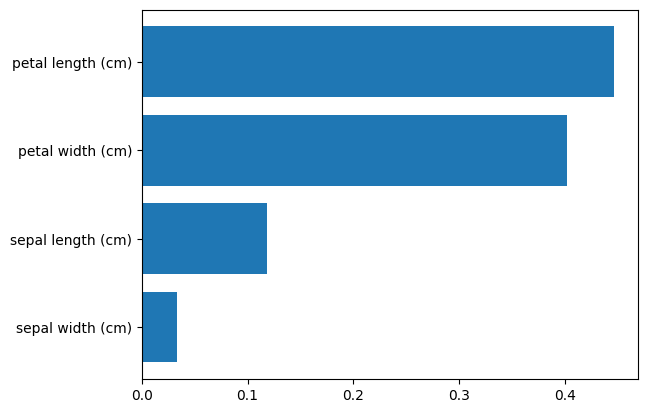

In [53]:
#comparison with randomtree classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

data, target = load_iris(return_X_y=True)
colnames=load_iris().feature_names+["target"];targetnames=load_iris().target_names
df=pd.DataFrame(np.concatenate((data, target.reshape(-1,1)), axis=1), columns=colnames)

#splitting train test split
train_data, test_data, train_target, test_target = train_test_split(data, target, random_state=233421, train_size=0.8)

'''
N=100;score=[]
for i in range(1, N, 1):
    model=RandomForestClassifier(n_estimators=i, random_state=37612)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    score.append(accuracy_score(test_target, predicted))

fig, ax = plt.subplots(figsize=(11,11))
ax.plot([i for i in range(1,N,1)], score, color="red", label="test", alpha=0.8)
ax.set_xlabel("n_estimator"); ax.set_ylabel("score"); ax.set_title("Finding the best n_estimator")
plt.show()
'''

model=RandomForestClassifier(n_estimators=60, random_state=37612)
model.fit(train_data, train_target)
predicted=model.predict(test_data)
print(accuracy_score(test_target, predicted))
print(confusion_matrix(test_target, predicted))

#importances
fig, ax =plt.subplots()
merged=list(zip(load_iris().feature_names, model.feature_importances_))
merged.sort(key=lambda x: x[1])
featurename, importances = list(zip(*merged))
ax.barh(featurename, importances)
plt.show()

In [57]:
#predict idk idk, bcz why not?
def predictsumthing(urdata):
    return(model.predict(urdata))

dummy=[[5.3,4.3,2,0.5]]
print(targetnames[predictsumthing(dummy)])

['setosa']


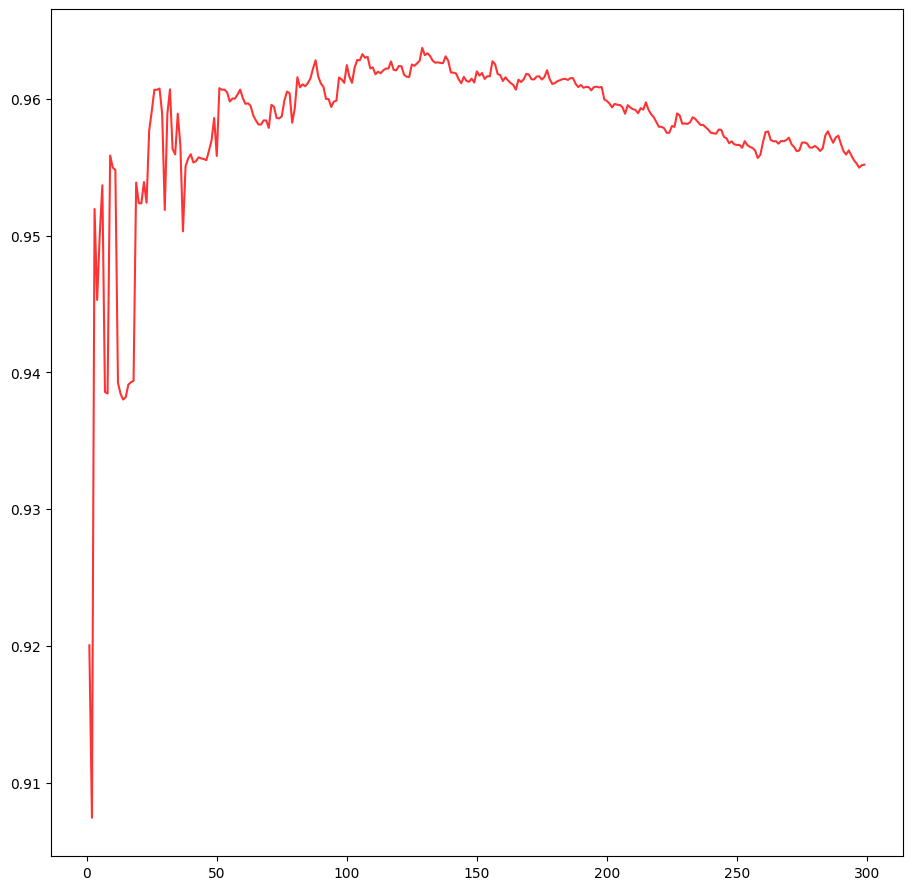

0.9637536901646063


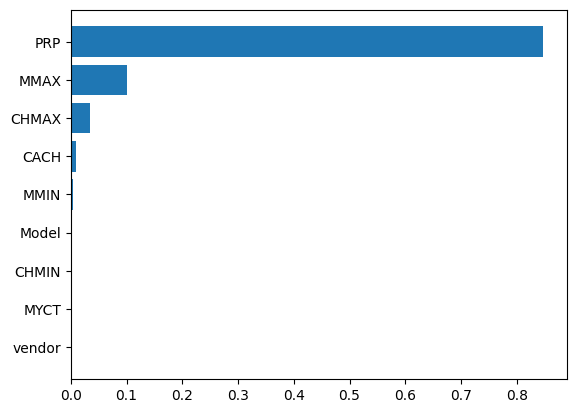

In [169]:
#testing regression on boosting algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import category_encoders as ec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("files/ComputerHardware/machine.data", header=None)
df.columns=["vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
#explore data
#df.isna().sum()
df=df[df!="None"].dropna()      #drop None 

data=df.iloc[:,:-1]
target=df.iloc[:,-1]
encoding=ec.OrdinalEncoder(cols=["vendor", "Model"])
encoding.fit(data)
data=encoding.transform(data)

#train test split
train_data, test_data, train_target, test_target = train_test_split(data, target, random_state=42312, train_size=0.8)

#brute
score=[]; N=300; gettingbestscore=[]
for i in range(1, N):
    model=AdaBoostRegressor(random_state=54232, n_estimators=i)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    temp=r2_score(test_target, predicted)
    score.append(temp)
    gettingbestscore.append((i, temp))
    
gettingbestscore.sort(key=lambda x:x[1], reverse=True)
    
fig, ax = plt.subplots(figsize=(11,11))
ax.plot([i for i in range(1, N, 1)], score, alpha=0.8, color="red", label="test")
plt.show()


#model adabost
model=AdaBoostRegressor(random_state=54232, n_estimators=int(gettingbestscore[0][0]))
model.fit(train_data, train_target)
predicted=model.predict(test_data)
print(r2_score(test_target, predicted))

#we gonna use the entire data set cuz the labels fucking suck
model=AdaBoostRegressor(random_state=54232, n_estimators=5)
model.fit(data, target)

#importances
fig, ax =plt.subplots()
merged=list(zip(df.columns[:-1], model.feature_importances_))
merged.sort(key=lambda x: x[1])
featurename, importances = list(zip(*merged))

ax.barh(featurename, importances)
plt.show()

In [170]:
def predictsumthing(urdata):
    temp=pd.DataFrame(urdata, columns=["vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"])
    temp=encoding.transform(temp)
    return model.predict(temp)

test1=predictsumthing([["ibm", "8130-b", 1500, 768, 2000, 0, 0, 0, 18]])
print(test1)

[38.51041667]


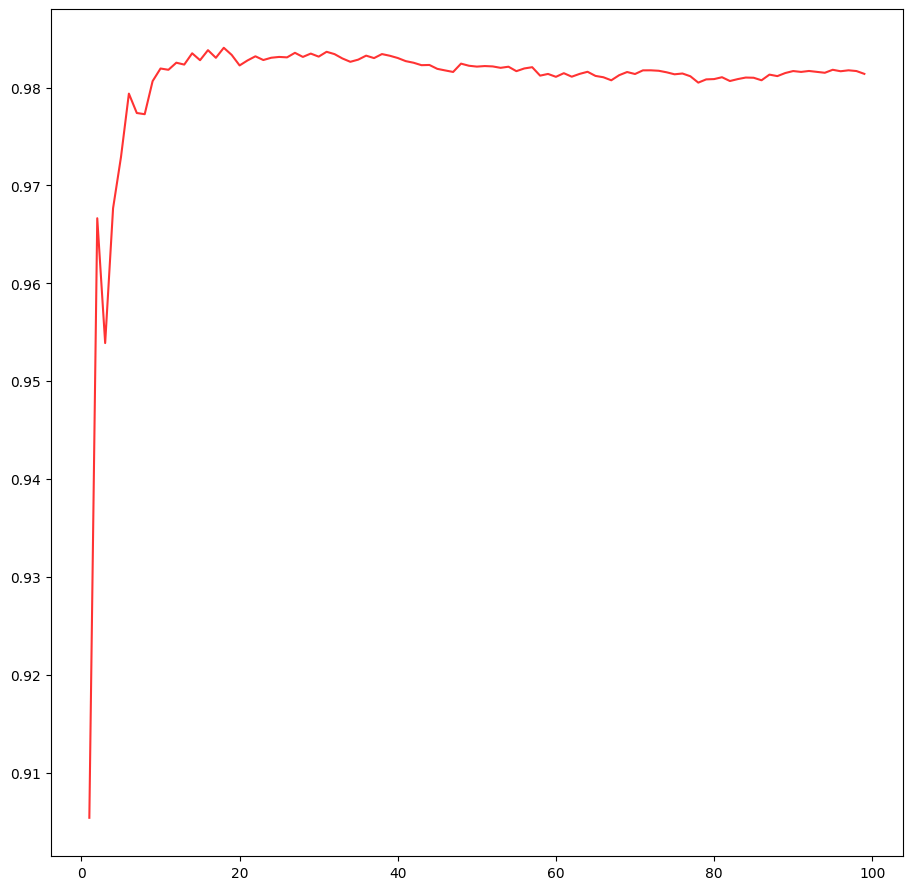

0.9840652562004609


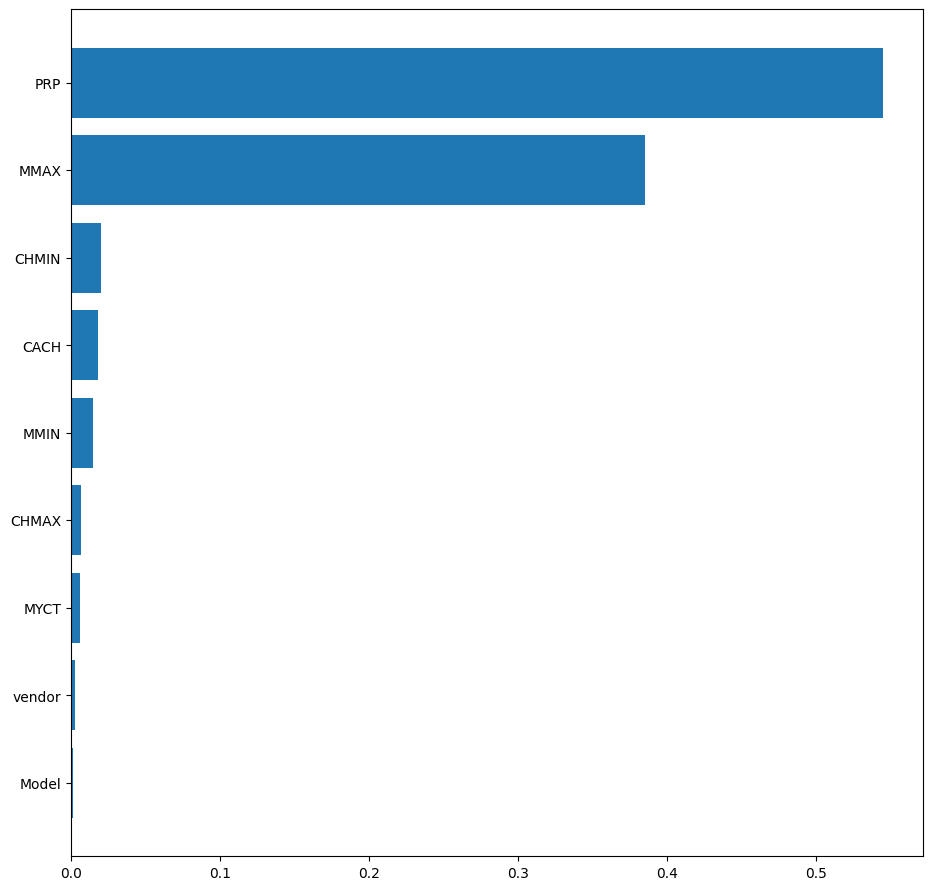

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce

#exploring and making data set
df=pd.read_csv("Files/ComputerHardware/machine.data", header=None)
df.columns=["vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
#df.isna().sum()
df=df[df!="None"].dropna()

#df -> array
data=df.iloc[:,:-1]
target=df.iloc[:,-1]

#encoder
encoder=ec.OrdinalEncoder(cols=["vendor", "Model"])
encoder.fit(data)
data=encoder.transform(data)

#train test split
train_data, test_data, train_target, test_target = train_test_split(data, target, random_state=42312, train_size=0.8)

#random forest classifier
    #getting the best model
score=[]; N=100; gettingbestscore=[]
for i in range(1, N):
    model=RandomForestRegressor(random_state=54232, n_estimators=i)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    temp=r2_score(test_target, predicted)
    score.append(temp)
    gettingbestscore.append((i, temp))
    
gettingbestscore.sort(key=lambda x:x[1], reverse=True)
    
fig, ax = plt.subplots(figsize=(11,11))
ax.plot([i for i in range(1, N, 1)], score, alpha=0.8, color="red", label="test")
plt.show()

model=RandomForestRegressor(random_state=54232, n_estimators=int(gettingbestscore[0][0]))
model.fit(train_data, train_target)
predicted=model.predict(test_data)
temp=r2_score(test_target, predicted)
print(temp)

fig, ax = plt.subplots(figsize=(11,11))
merged=list(zip(df.columns[:-1], model.feature_importances_))
merged.sort(key=lambda x: x[1])
featurename, importances = list(zip(*merged))
ax.barh(featurename, importances)
plt.show()

In [173]:
def predictsumthing(urdata):
    temp=pd.DataFrame(urdata, columns=["vendor", "Model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"])
    temp=encoding.transform(temp)
    return model.predict(temp)

test1=predictsumthing([["ibm", "8130-b", 1500, 768, 2000, 0, 0, 0, 18]])
print(test1)


[20.55555556]
